In [21]:
pip install tensorflow

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
data = pd.read_csv("/content/agricultural_yield.csv")
data.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [24]:
X = data[['Soil_Quality', 'Seed_Variety', 'Fertilizer_Amount_kg_per_hectare', 'Sunny_Days', 'Rainfall_mm', 'Irrigation_Schedule']]
y = data['Yield_kg_per_hectare'].values


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
model = Sequential([
                    Dense(128, activation='relu', input_shape= (X_train.shape[1],)),
                    Dense(64, activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(1)
                    ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(optimizer = 'adam',
              loss= 'mse',
              metrics = ['mae'])

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,265 (44.00 KB)

 Trainable params: 11,265 (44.00 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 519870.0625 - mae: 692.4363 - val_loss: 431024.0938 - val_mae: 628.5870
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 264105.9375 - mae: 457.8949 - val_loss: 15545.3223 - val_mae: 99.1606
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 14009.7334 - mae: 94.5900 - val_loss: 11541.9502 - val_mae: 85.3521
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 10797.4990 - mae: 82.5918 - val_loss: 9714.7588 - val_mae: 78.5930
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8998.8506 - mae: 75.2167 - val_loss: 8215.0732 - val_mae: 72.3233
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7742.1196 - mae: 69.6687 - val_loss: 7024.7007 - val_mae: 66.6267
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6687.4722 - mae: 65.5671 - val_loss: 6000.0786 - val_mae: 61.5485
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5730.3149 - mae: 60.3477 - val_loss: 5245.5361 - val_mae: 57.

In [40]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2706.3828 - mae: 42.2230 
Test Mean Absolute Error: 40.22


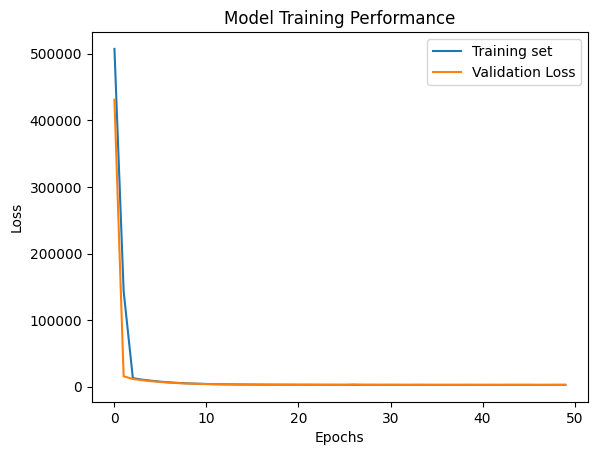

In [42]:
plt.plot(history.history['loss'],label='Training set')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()


In [33]:
y_pred = model.predict(X_test)
y_pred

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[ 440.68433],
       [ 646.1511 ],
       [1060.5607 ],
       [ 660.1049 ],
       [ 811.156  ],
       [ 983.59503],
       [ 307.4857 ],
       [ 598.3383 ],
       [ 454.00018],
       [ 789.7722 ],
       [ 586.77216],
       [ 677.3441 ],
       [ 623.11194],
       [ 733.0954 ],
       [ 839.9565 ],
       [ 665.4088 ],
       [ 957.6502 ],
       [ 475.56552],
       [ 583.01154],
       [ 371.66623],
       [ 787.12555],
       [ 792.8663 ],
       [ 365.33118],
       [ 822.7375 ],
       [ 999.70276],
       [ 590.4383 ],
       [ 647.3737 ],
       [ 955.2066 ],
       [ 636.5085 ],
       [ 611.4639 ],
       [ 682.81134],
       [ 796.2734 ],
       [ 830.111  ],
       [ 790.2951 ],
       [ 502.6355 ],
       [ 703.0778 ],
       [ 710.74445],
       [ 999.278  ],
       [ 201.62308],
       [ 645.1069 ],
       [ 929.98413],
       [ 884.86554],
       [ 776.16925],
       [ 764.3343 ],
       [ 603.09064],
       [ 820.1611 ],
       [ 612.47485],
       [ 558.

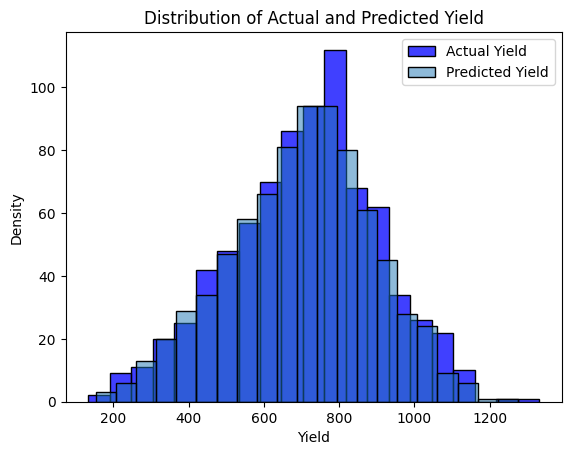

In [63]:
import seaborn as sns
sns.histplot(y_test, label='Actual Yield', color ='blue')
sns.histplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()


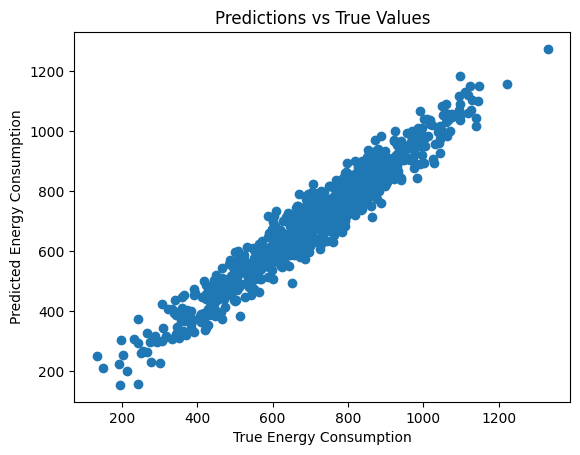

In [58]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs True Values')
plt.show()
